## Stili di Gioco

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from highlight_text import fig_text, ax_text
from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import scipy.stats as stats


from mplsoccer import Pitch

from PIL import Image
import urllib
import os

In [3]:
font_path = "../Grafici/assets/fonts/"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("../Grafici/assets/stylesheets/soc_base.mplstyle")
plt.rcParams['font.family'] = 'Karla'

## Data

In [4]:
df = pd.read_csv('data/team_dribbling.csv', index_col=0)

In [5]:
'''
df = (
    df.groupby(['player_id', 'player_first_name', 'player_last_name'])
    [['minutes', 'long_balls_att', 'long_balls_succ']].sum()
    .reset_index()
)
df
'''
df

,team_id,Team,dr_att,dr_compl,perc_dr_compl
0,9875,Napoli,764,322,42.1
1,8543,Lazio,579,269,46.5
2,9885,Juventus,588,272,46.3
3,8636,Inter,471,207,43.9
4,8524,Atalanta,751,329,43.8
5,8564,Milan,755,349,46.2
6,8686,Roma,641,259,40.4
7,8535,Fiorentina,669,299,44.7
8,9857,Bologna,543,255,47.0
9,6504,Monza,561,267,47.6


In [6]:
df_plot = df[(df['minutes'] >= df['minutes'].median()) & (df['long_balls_att'] >= df['long_balls_att'].median())]
df_plot

KeyError: 'minutes'

In [7]:
df = df.assign(dr_att_p90 = lambda x: round((x.dr_att/3240)*90, 1))
#df_plot = df_plot.assign(succ_rate = lambda x: x.long_balls_succ/x.long_balls_att)

In [8]:
df.sort_values(by='dr_att_p90', ascending=False)

,team_id,Team,dr_att,dr_compl,perc_dr_compl,dr_att_p90
0,9875,Napoli,764,322,42.1,21.2
5,8564,Milan,755,349,46.2,21.0
4,8524,Atalanta,751,329,43.8,20.9
12,8600,Udinese,727,306,42.1,20.2
7,8535,Fiorentina,669,299,44.7,18.6
14,8534,Empoli,656,289,44.1,18.2
10,9804,Torino,643,292,45.4,17.9
6,8686,Roma,641,259,40.4,17.8
17,9881,Spezia,625,270,43.2,17.4
11,7943,Sassuolo,623,282,45.3,17.3


In [9]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [ ]:
df['team_id'].to_list()

[9875,
 8543,
 9885,
 8636,
 8524,
 8564,
 8686,
 8535,
 9857,
 6504,
 9804,
 7943,
 8600,
 6480,
 8534,
 9888,
 9876,
 9881,
 7801,
 9882]

In [10]:
dr_att_med = df['dr_att_p90'].median()
perc_dr_compl_med = df['perc_dr_compl'].median()

## The Viz

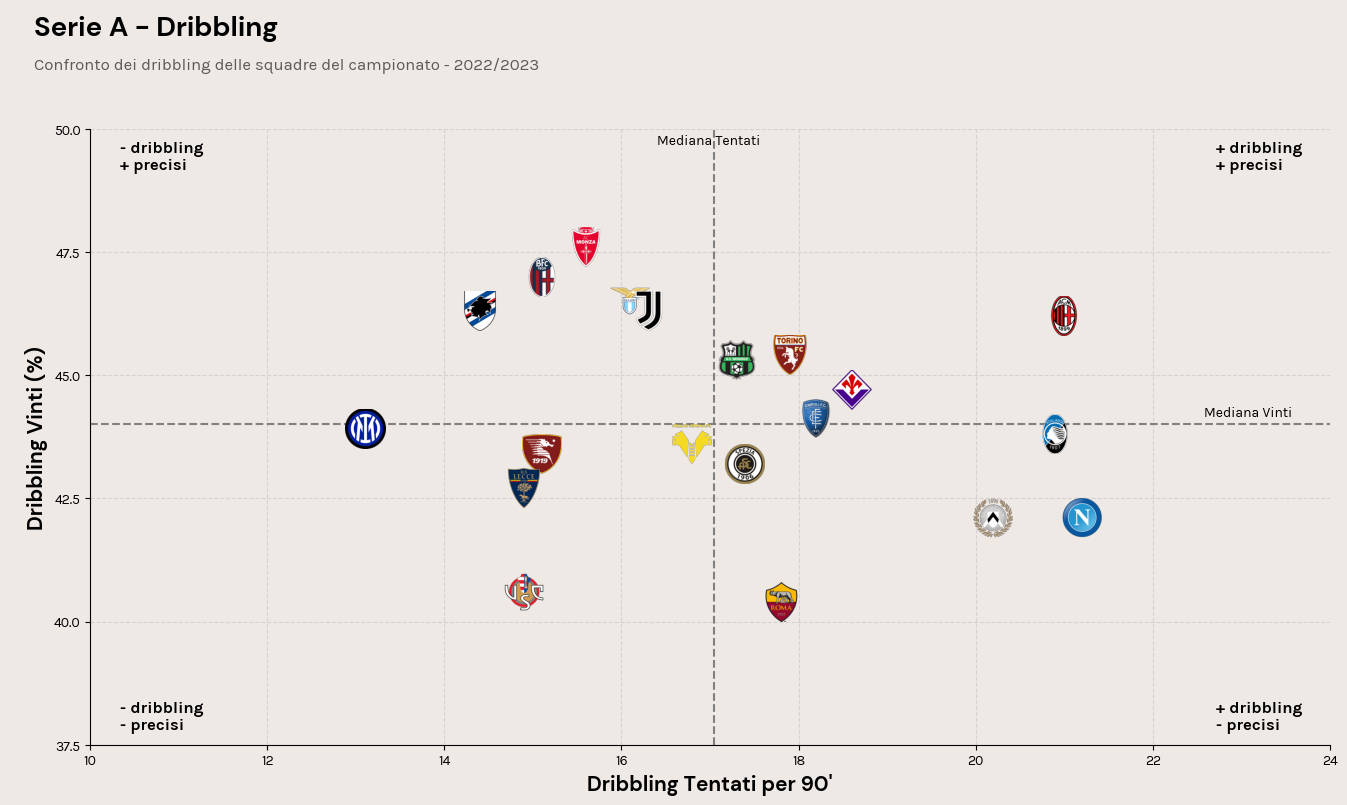

In [43]:
fig = plt.figure(figsize=(16,8), dpi=100)
ax = plt.subplot()
ax.grid(visible=True, ls='--', color='lightgrey')

ax.scatter(
    df['dr_att_p90'], df['perc_dr_compl'], 
    #c='blue', #cmap='inferno',
    zorder=3, ec='grey', s=55, alpha=0)

ax.annotate(
    xy=(.443,0.83),
    text='Mediana Tentati' ,
    xycoords='figure fraction',
    ha='center',
    va='center'
)
    
ax.annotate(
    xy=(0.78,.49),
    text='Mediana Vinti' ,
    xycoords='figure fraction',
    ha='center',
    va='center'
)

ax.annotate(
    xy=(0.76, 0.11),
    text='+ dribbling\n- precisi' ,
    xycoords='figure fraction',
    ha='left',
    va='center',
    fontsize = 12, color = "black", font = "Karla", weight = "bold"
)

ax.annotate(
    xy=(0.76, 0.81),
    text='+ dribbling\n+ precisi' ,
    xycoords='figure fraction',
    ha='left',
    va='center',
    fontsize = 12, color = "black", font = "Karla", weight = "bold"
)

ax.annotate(
    xy=(0.075, 0.81),
    text='- dribbling\n+ precisi' ,
    xycoords='figure fraction',
    ha='left',
    va='center',
    fontsize = 12, color = "black", font = "Karla", weight = "bold"
)

ax.annotate(
    xy=(0.075, 0.11),
    text='- dribbling\n- precisi' ,
    xycoords='figure fraction',
    ha='left',
    va='center',
    fontsize = 12, color = "black", font = "Karla", weight = "bold"
)


texts = []
#annotated_df = df[df['annotated']].reset_index(drop=True)
'''
for index in range(df.shape[0]):
    texts += [
        ax.text(
            x=df['dr_att_p90'].iloc[index], y=df['perc_dr_compl'].iloc[index],
            s=f"{df['Team'].iloc[index][0]}",
            path_effects=[path_effects.Stroke(linewidth=2, foreground=fig.get_facecolor()), 
            path_effects.Normal()], color='black',
            family='DM Sans', weight='bold'
        )
    ]

adjust_text(texts, only_move={'points':'y', 'text':'xy', 'objects':'xy'})
'''
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0%}'))
ax.set_xlim(10, 24)
ax.set_ylim(37.5,50)

ax.set_ylabel('Dribbling Vinti (%)', fontsize = 15, color = "black", font = "DM Sans", weight = "bold")
ax.set_xlabel('Dribbling Tentati per 90\'', fontsize = 15, color = "black", font = "DM Sans", weight = "bold")

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05

counter = 0
for x,y in zip(df['dr_att_p90'], df['perc_dr_compl']):
    ax_coords = DC_to_NFC((x,y))
    image_ax = fig.add_axes(
        [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size, ax_size],
         fc='None'
    )
    ax_logo(df['team_id'].to_list()[counter], image_ax)

    counter += 1

ax.axhline(y=perc_dr_compl_med, ls='--', color='grey')
ax.axvline(x=dr_att_med, ls='--', color='grey')



fig_text(
    x = 0.09, y = .99, 
    s = "Serie A - Dribbling",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

fig_text(
    x = 0.09, y = 0.95, 
    s = "Confronto dei dribbling delle squadre del campionato - 2022/2023",
    va = "bottom", ha = "left",
    fontsize = 12, color = "#5A5A5A", font = "Karla"
)

plt.savefig(
	"figures/SerieA_Team_Dribbling.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/SerieA_Team_Dribbling_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)


In [99]:
team_id = [9875,
 8543,
 9885,
 8636,
 8524,
 8564,
 8686,
 8535,
 9857,
 6504,
 9804,
 7943,
 8600,
 6480,
 8534,
 9888,
 9876,
 9881,
 7801,
 9882]

team_id

[9875,
 8543,
 9885,
 8636,
 8524,
 8564,
 8686,
 8535,
 9857,
 6504,
 9804,
 7943,
 8600,
 6480,
 8534,
 9888,
 9876,
 9881,
 7801,
 9882]

In [100]:
df = pd.read_csv('data/players_dribbling.csv', index_col=0)
df = df.drop('NoCol', axis=1)
df = df.replace('', np.nan)

df = df.assign(mins = lambda x: x["90s"]*90)
df = df.assign(perc_succ = lambda x: (x["Succ%"]/100))
df


,Player,Nation,Pos,Squad,90s,Att,Succ,Succ%,player_id,mins,perc_succ
1,James Abankwah,ie IRL,DF,Udinese,0.1,10.00,10.00,100.0,NaN,9.0,1.000
2,Oliver Abildgaard,dk DEN,MF,Hellas Verona,6.3,0.16,0.16,100.0,NaN,567.0,1.000
3,Tammy Abraham,eng ENG,FW,Roma,24.0,2.79,0.92,32.8,NaN,2160.0,0.328
4,Christian Acella,it ITA,MF,Cremonese,0.2,0.00,0.00,NaN,NaN,18.0,NaN
5,Francesco Acerbi,it ITA,DF,Inter,25.6,0.47,0.27,58.3,NaN,2304.0,0.583
...,...,...,...,...,...,...,...,...,...,...,...
581,Petar Zovko,ba BIH,GK,Spezia,0.8,0.00,0.00,NaN,NaN,72.0,NaN
582,Szymon Żurkowski,pl POL,MF,Fiorentina,0.4,2.50,0.00,0.0,NaN,36.0,0.000
583,Szymon Żurkowski,pl POL,MF,Spezia,3.3,2.73,2.12,77.8,NaN,297.0,0.778
584,Milan Đurić,ba BIH,FW,Hellas Verona,13.5,0.37,0.15,40.0,NaN,1215.0,0.400


In [101]:
df['mins'].median()

1071.0

In [102]:
df_plot = df[(df['mins'] >= 1500) & (df['Succ'] >= df['Succ'].median())]

df

,Player,Nation,Pos,Squad,90s,Att,Succ,Succ%,player_id,mins,perc_succ
1,James Abankwah,ie IRL,DF,Udinese,0.1,10.00,10.00,100.0,NaN,9.0,1.000
2,Oliver Abildgaard,dk DEN,MF,Hellas Verona,6.3,0.16,0.16,100.0,NaN,567.0,1.000
3,Tammy Abraham,eng ENG,FW,Roma,24.0,2.79,0.92,32.8,NaN,2160.0,0.328
4,Christian Acella,it ITA,MF,Cremonese,0.2,0.00,0.00,NaN,NaN,18.0,NaN
5,Francesco Acerbi,it ITA,DF,Inter,25.6,0.47,0.27,58.3,NaN,2304.0,0.583
...,...,...,...,...,...,...,...,...,...,...,...
581,Petar Zovko,ba BIH,GK,Spezia,0.8,0.00,0.00,NaN,NaN,72.0,NaN
582,Szymon Żurkowski,pl POL,MF,Fiorentina,0.4,2.50,0.00,0.0,NaN,36.0,0.000
583,Szymon Żurkowski,pl POL,MF,Spezia,3.3,2.73,2.12,77.8,NaN,297.0,0.778
584,Milan Đurić,ba BIH,FW,Hellas Verona,13.5,0.37,0.15,40.0,NaN,1215.0,0.400


In [103]:
def get_player_position(player_id):
    '''
    This function gets the main player position based on it's Fotmob ID.
    '''

    url = f'https://www.fotmob.com/api/playerData?id={player_id}'
    response = requests.get(url)
    content = json.loads(response.content)

    player_positions = content.get('origin').get('positionDesc').get('positions')
    for position in player_positions:
        if position['isMainPosition']:
            return position['strPosShort']['label']
        else:
            continue

In [104]:
def draw_player_image_at_ax(player_id, ax, grayscale=False):
    '''
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/playerimages/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{player_id:.0f}.png'))
    if grayscale:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

def draw_club_image_at_ax(team_id, ax, grayscale=False):
    '''
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    if grayscale:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from matplotlib.patches import Ellipse
import matplotlib.patches as mpatches
from matplotlib import cm
from highlight_text import fig_text, ax_text
from ast import literal_eval

from PIL import Image
import urllib
import os
import requests
import json

# -- For Logos and images
from matplotlib.transforms import Bbox
class BboxLocator:
    def __init__(self, bbox, transform):
        self._bbox = bbox
        self._transform = transform
    def __call__(self, ax, renderer):
        _bbox = self._transform.transform_bbox(self._bbox)
        return ax.figure.transFigure.inverted().transform_bbox(_bbox)

In [108]:
worst = df_plot['Att'].quantile(.85)
df_final = df_plot[df_plot['Att'] > worst].reset_index(drop=True).sort_values(by="Att", ascending=True)#.reset_index(drop=True)
df_final

,Player,Nation,Pos,Squad,90s,Att,Succ,Succ%,player_id,mins,perc_succ
10,Dany Mota,pt POR,FWMF,Monza,19.9,3.37,1.51,44.8,737339.0,1791.0,0.448
13,Gabriel Strefezza,br BRA,FWMF,Lecce,25.4,3.50,1.38,39.3,836436.0,2286.0,0.393
2,Rasmus Højlund,dk DEN,FW,Atalanta,18.5,3.62,1.46,40.3,1199272.0,1665.0,0.403
11,Riccardo Orsolini,it ITA,FW,Bologna,22.9,3.67,1.40,38.1,661761.0,2061.0,0.381
3,Jonathan Ikone,fr FRA,FW,Fiorentina,20.5,3.95,1.95,49.4,637745.0,1845.0,0.494
14,Iyenoma Udogie,it ITA,DF,Udinese,29.0,4.00,1.62,40.5,1052898.0,2610.0,0.405
1,Brahim Díaz,es ESP,MFFW,Milan,19.7,4.06,1.93,47.5,750027.0,1773.0,0.475
12,Fabiano Parisi,it ITA,DF,Empoli,31.4,4.11,2.04,49.6,1093285.0,2826.0,0.496
7,Ademola Lookman,ng NGA,FWMF,Atalanta,18.5,4.16,1.84,44.2,690516.0,1665.0,0.442
15,Mattia Zaccagni,it ITA,FW,Lazio,29.5,4.24,2.03,48.0,541555.0,2655.0,0.480


In [120]:
df_final['Pos'] = [get_player_position(int(x)) for x in df_final['player_id']]
df_final['Pos'] = df_final['Pos'].replace({'ST': 'ATT', 'RW': 'AD', 'LB': 'TS', 'AM': 'TRQ', 'LW': 'AS', 'CM': 'CC'})
df_final['Pos'].unique()

array(['ATT', 'AD', 'TS', 'TRQ', 'AS', 'CC'], dtype=object)

In [121]:
df_final['Succ%'].iloc[0]
df_final = df_final.assign(team_id=pd.Series(dtype=int))
df_final.at[10, "team_id"] = 6504
df_final.at[13, "team_id"] = 9888
df_final.at[2, "team_id"] = 8524
df_final.at[11, "team_id"] = 9857
df_final.at[3, "team_id"] = 8535
df_final.at[14, "team_id"] = 8600
df_final.at[1, "team_id"] = 8564
df_final.at[12, "team_id"] = 8534
df_final.at[7, "team_id"] = 8524
df_final.at[15, "team_id"] = 8543
df_final.at[8, "team_id"] = 9875
df_final.at[9, "team_id"] = 6480
df_final.at[0, "team_id"] = 9881
df_final.at[5, "team_id"] = 7943
df_final.at[6, "team_id"] = 8564
df_final.at[4, "team_id"] = 9875
df_final

,Player,Nation,Pos,Squad,90s,Att,Succ,Succ%,player_id,mins,perc_succ,team_id
10,Dany Mota,pt POR,ATT,Monza,19.9,3.37,1.51,44.8,737339.0,1791.0,0.448,6504.0
13,Gabriel Strefezza,br BRA,AD,Lecce,25.4,3.50,1.38,39.3,836436.0,2286.0,0.393,9888.0
2,Rasmus Højlund,dk DEN,ATT,Atalanta,18.5,3.62,1.46,40.3,1199272.0,1665.0,0.403,8524.0
11,Riccardo Orsolini,it ITA,AD,Bologna,22.9,3.67,1.40,38.1,661761.0,2061.0,0.381,9857.0
3,Jonathan Ikone,fr FRA,AD,Fiorentina,20.5,3.95,1.95,49.4,637745.0,1845.0,0.494,8535.0
14,Iyenoma Udogie,it ITA,TS,Udinese,29.0,4.00,1.62,40.5,1052898.0,2610.0,0.405,8600.0
1,Brahim Díaz,es ESP,TRQ,Milan,19.7,4.06,1.93,47.5,750027.0,1773.0,0.475,8564.0
12,Fabiano Parisi,it ITA,TS,Empoli,31.4,4.11,2.04,49.6,1093285.0,2826.0,0.496,8534.0
7,Ademola Lookman,ng NGA,ATT,Atalanta,18.5,4.16,1.84,44.2,690516.0,1665.0,0.442,8524.0
15,Mattia Zaccagni,it ITA,AS,Lazio,29.5,4.24,2.03,48.0,541555.0,2655.0,0.480,8543.0


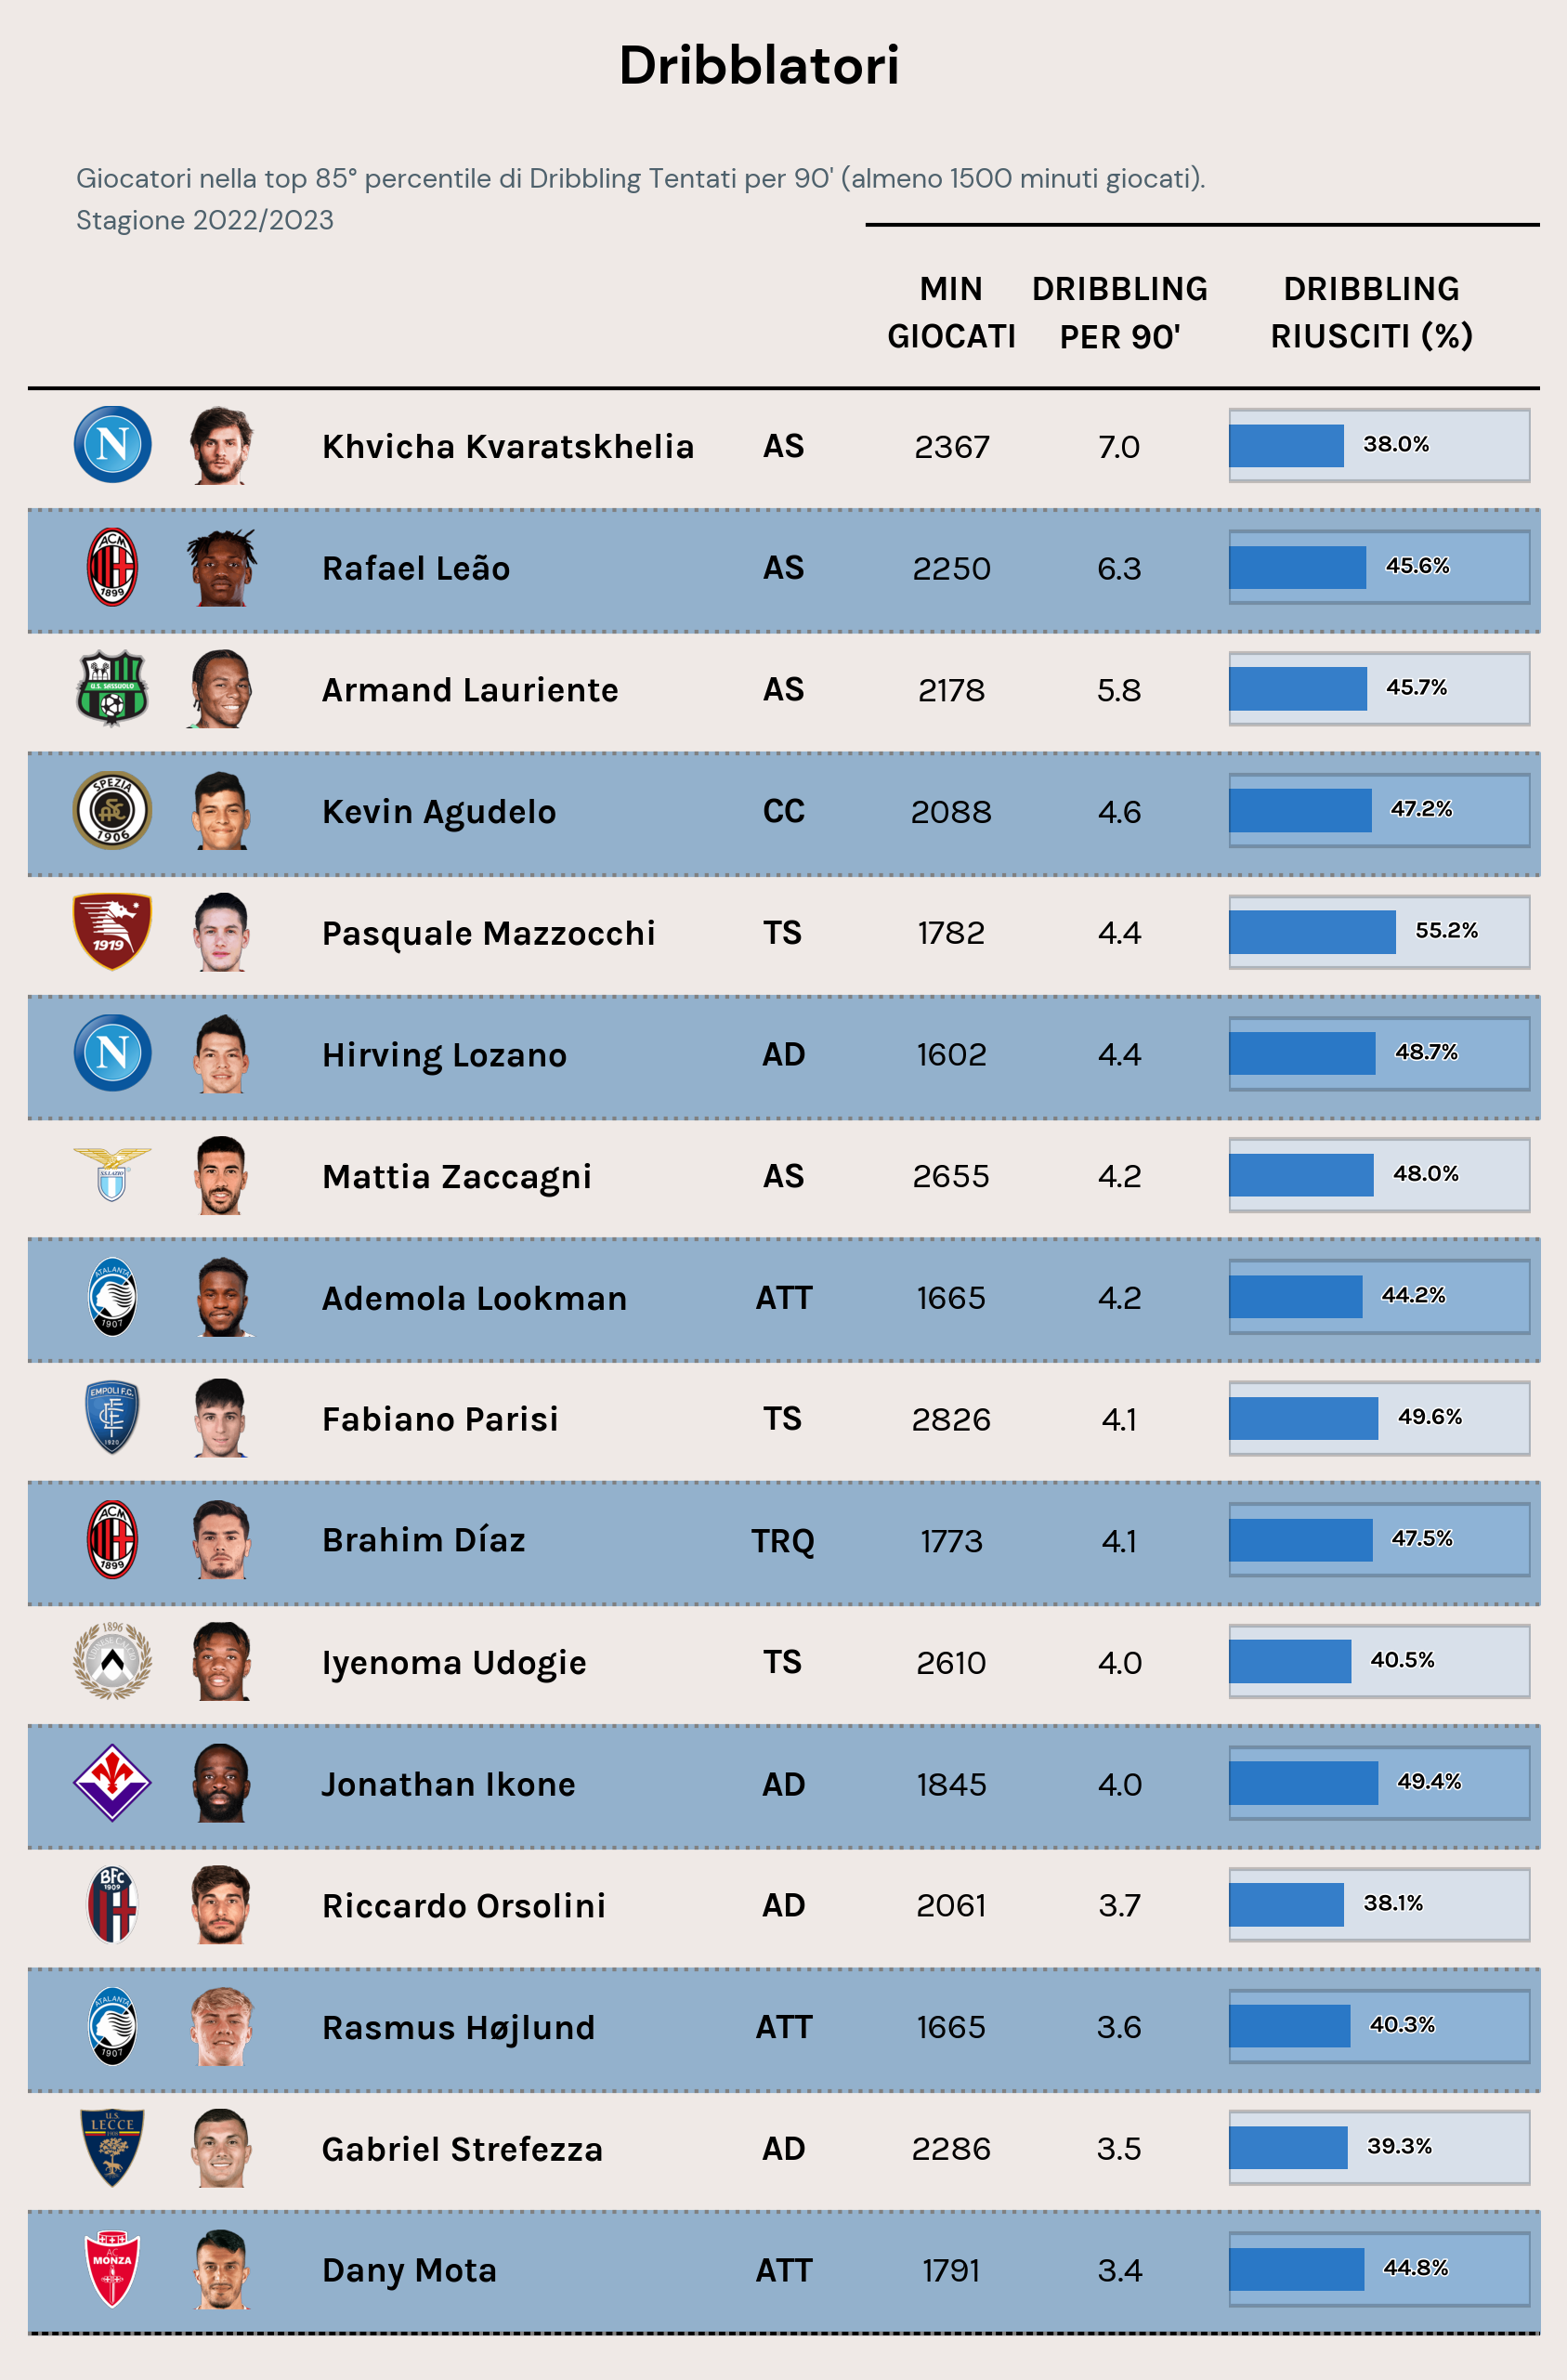

In [130]:
fig = plt.figure(figsize=(7,10), dpi=300)
ax = plt.subplot()

nrows = df_final.shape[0]
ncols = 8 # because I want to remove aprox. 3 columns from my DF

ax.set_xlim(0, ncols + 1)
ax.set_ylim(-.65, nrows + 1)

# calculate asymmetry of x and y axes: (I have no idea how this works)
x0, y0 = ax.transAxes.transform((0, 0)) # lower left in pixels
x1, y1 = ax.transAxes.transform((1, 1)) # upper right in pixes
dx = x1 - x0
dy = y1 - y0
maxd = max(dx, dy)
width = .24 * maxd / dx
height = .83 * maxd / dy

# Iterate
for y in range(0, nrows):
    # -- Club Logo
    bbox = Bbox.from_bounds(0, y - .295, 1, .65)
    logo_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    draw_club_image_at_ax(df_final['team_id'].iloc[y], logo_ax)
    #'''
    # -- Player picture
    #circle = Ellipse((1.15, y), width, height, ec='grey', fc=fig.get_facecolor(), transform=ax.transData, lw=.65)
    bbox = Bbox.from_bounds(.65, y - .295, 1, .65)
    logo_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    draw_player_image_at_ax(df_final['player_id'].iloc[y], logo_ax)
    #ax.add_artist(circle)
    #'''
    # -- Player name
    ax_text(
        x=1.75, y=y,
        s=df_final['Player'].iloc[y],
        weight='bold', size=9,
        ha='left', va='center', ax=ax, family='Karla'
    )
    # -- Player Pos
    ax_text(
        x=4.5, y=y,
        s=df_final['Pos'].iloc[y],
        weight='bold', size=9,
        ha='center', va='center', ax=ax
    )
    # -- Minutes played
    ax_text(
        x=5.5, y=y,
        s=f"{df_final['mins'].iloc[y]:.0f}",
        size=9,
        ha='center', va='center', ax=ax
    )
    # # -- Crosses
    ax_text(
        x=6.5, y=y,
        s=f"{df_final['Att'].iloc[y]:,.1f}",
        size=9,
        ha='center', va='center', ax=ax
    )
    # # -- Battery Chart
    bbox = Bbox.from_bounds(7.15, y - .295, 1.8, .65)
    battery_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    battery_ax.set_xlim(0,1)
    battery_ax.barh(y=.5, width=df_final['perc_succ'].iloc[y], height=.3, alpha=.85, color='#005AB5') #color='#0C7BDC')
    battery_ax.barh(y=.5, width=1, height=.5, alpha=.2, color='#7CBDFF', ec='black') #color='#52AEFF',
    text_ = battery_ax.annotate(
        xy=(df_final['perc_succ'].iloc[y], .5),
        xytext=(5,0),
        textcoords='offset points',
        text=f"{df_final['perc_succ'].iloc[y]:.1%}",
        ha='left', va='center',
        size=6, weight='bold'
    )
    text_.set_path_effects(
                [path_effects.Stroke(linewidth=.75, foreground="white"), 
                path_effects.Normal()]
            )
    battery_ax.set_axis_off()
    

# -- Draw border lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows - .5, nrows - .5], lw=1, color='black', zorder=3)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [-.5, -.5], lw=1, color='black', zorder=3)
for x in range(nrows):
    if x % 2 == 0:
        ax.fill_between(x=[ax.get_xlim()[0], ax.get_xlim()[1]], y1=x-.5, y2=x+.5, color='#93B1CC', zorder=-1)#d7c8c1
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x - .5, x - .5], lw=1, color='grey', ls=':', zorder=3)

ax.set_axis_off()


# -- Column titles
ax_text(
    x=5.5, y=nrows + .1,
    s='MIN\nGIOCATI',
    size=9,
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)
ax_text(
    x=6.5, y=nrows + .1,
    s='DRIBBLING\nPER 90\'',
    size=9,
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)
ax_text(
    x=8, y=nrows + .1,
    s='DRIBBLING\nRIUSCITI (%)',
    size=9,
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)

ax.plot([5, ax.get_xlim()[1]], [nrows + .85, nrows + .85], lw=1, color='black', zorder=3)

fig_text(
    x = 0.5, y = .92, 
    s = "Dribblatori",
    va = "bottom", ha = "center",
    fontsize = 14, color = "black", font = "DM Sans", weight = "bold"
)
fig_text(
	x = 0.15, y = .87, 
    s = "Giocatori nella top 85° percentile di Dribbling Tentati per 90' (almeno 1500 minuti giocati).\nStagione 2022/2023",
	va = "bottom", ha = "left",
	fontsize = 7, color = "#4E616C", font = "DM Sans"
)

plt.savefig(
	"figures/SeriA_Players_Dribbling_Table1.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

# plt.savefig(
# 	"figures/01092023_epl_crosses_tr.png",
# 	dpi = 600,
# 	facecolor = "none",
# 	bbox_inches="tight",
#     edgecolor="none",
# 	transparent = True
# )